## Notebook 2: Spark implementation
Plotting the results by importing the CSV files.


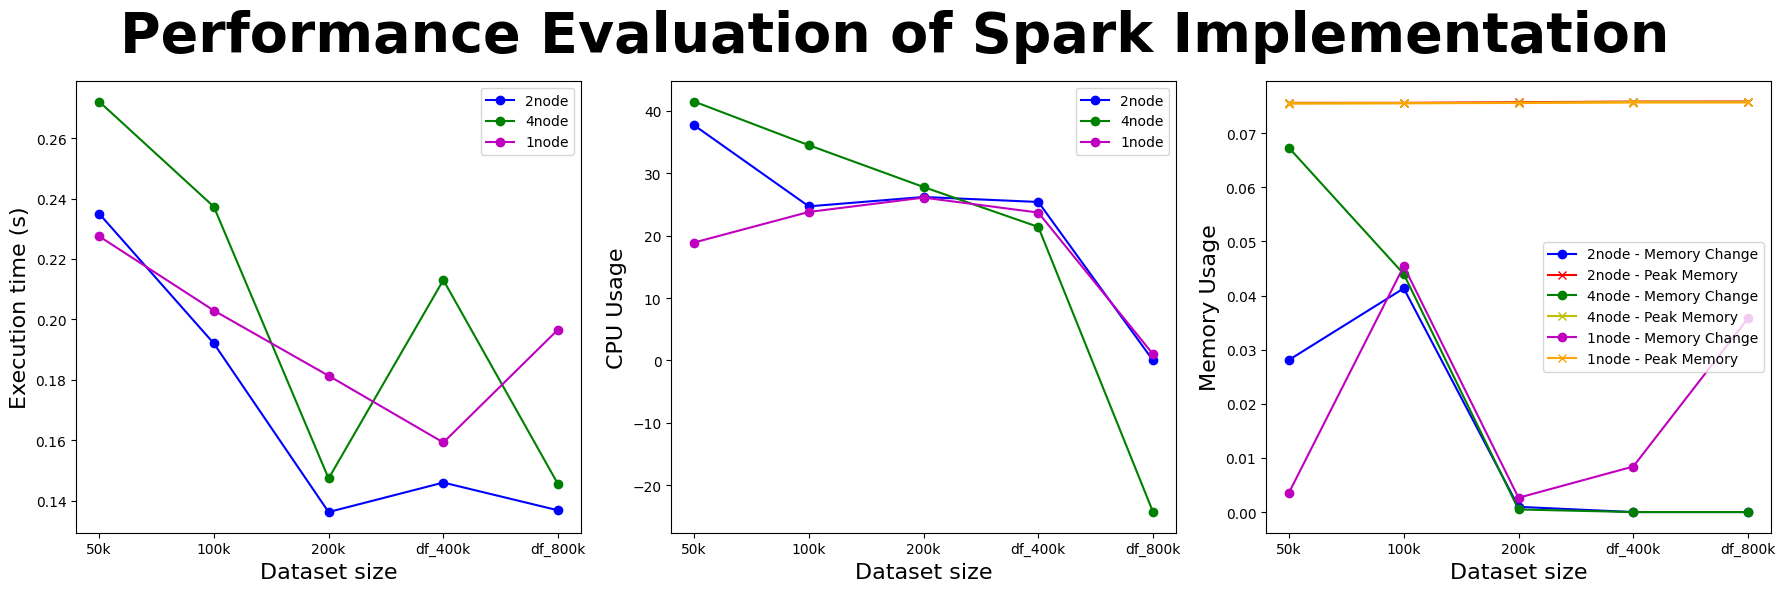

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load all CSV files from a given directory into a list of DataFrames.
def load_csv_files(directory):
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    dataframes = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
    return dataframes, csv_files

# Remove 'reddit_' and '.json' from labels.
def clean_x_labels(labels):
    return [re.sub(r'^reddit_|\.json$', '', label) for label in labels]

# Clean file names for better labeling
def clean_file_label(label):
    return re.sub(r'^results_|\.csv$', '', label)

# Plot the results
def plot_csv_data(dataframes, csv_files):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    colors = ['b', 'g', 'm', 'c']  # To differentiate lines from different files
    mem_colors = ['r', 'y', 'orange']
    fig.suptitle(r"Performance Evaluation of Spark Implementation", fontsize=40, fontweight='bold')
    
    for df_idx, (df, label) in enumerate(zip(dataframes, csv_files)):
        if df.shape[1] < 7:
            print(f"Skipping {label} as it has less than 7 columns.")
            continue
        
        x = df.iloc[:, 0].astype(str).apply(lambda s: re.sub(r'^reddit_|\.json$', '', s))  # Clean x-axis labels
        clean_label = clean_file_label(label)  # Clean label for legend
        y_labels = ["Execution time (s)", "CPU Usage"]
        
        # Plot columns 3 and 4 in the first two subplots
        for i, col in enumerate([2, 3]):  # Adjusted indices for skipping column 2
            axes[i].plot(x, df.iloc[:, col], label=f'{clean_label}', color=colors[df_idx], marker='o')
            axes[i].set_xlabel('Dataset size', fontsize=16)
            axes[i].set_ylabel(y_labels[i], fontsize=16)
            axes[i].legend()
        
        # Plot columns 5 and 6 together in the third subplot
        axes[2].plot(x, df.iloc[:, 4], label=f'{clean_label} - Memory Change', color=colors[df_idx], marker='o')
        axes[2].plot(x, df.iloc[:, 5], label=f'{clean_label} - Peak Memory', color=mem_colors[df_idx], linestyle='-', marker='x')
        axes[2].set_xlabel('Dataset size', fontsize=16)
        axes[2].set_ylabel('Memory Usage', fontsize=16)
        axes[2].legend()
    
    plt.tight_layout()
    plt.savefig("./results/result_3plots.png", dpi=300)
    plt.show()

# Main execution
directory = "./results"  # Change this to your actual directory
if os.path.exists(directory):
    dataframes, csv_files = load_csv_files(directory)
    plot_csv_data(dataframes, csv_files)
else:
    print("The specified directory does not exist. Please update the path.")

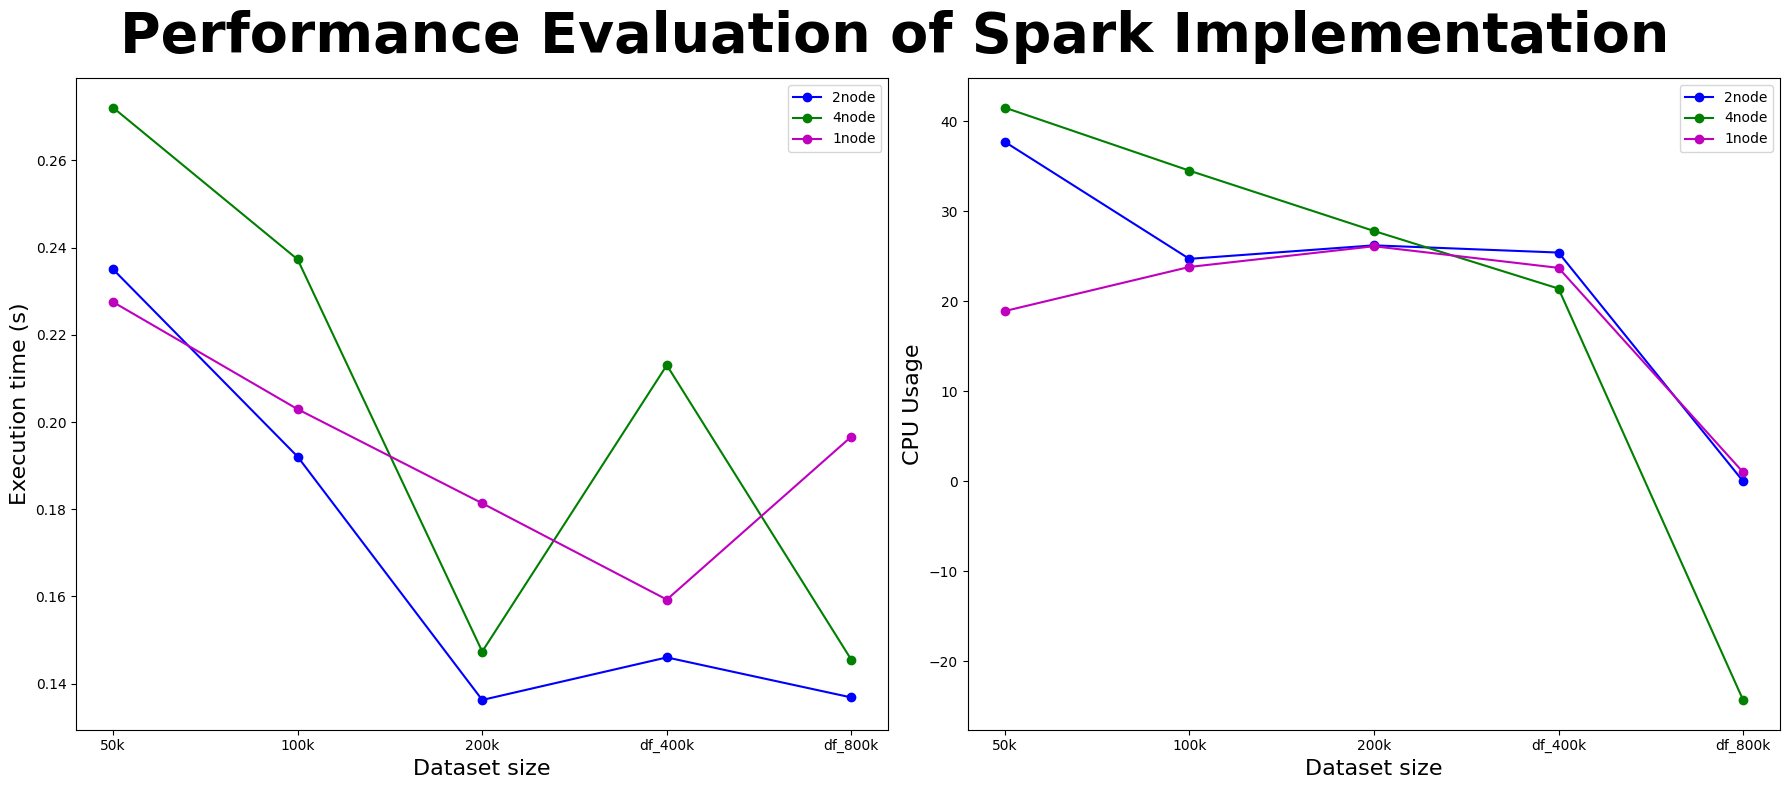

In [2]:
# Load all CSV files from a given directory into a list of DataFrames.
def load_csv_files(directory):
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    dataframes = [pd.read_csv(os.path.join(directory, file)) for file in csv_files]
    return dataframes, csv_files

# Remove 'reddit_' and '.json' from labels.
def clean_x_labels(labels):
    return [re.sub(r'^reddit_|\.json$', '', label) for label in labels]

# Clean file names for better labeling
def clean_file_label(label):
    return re.sub(r'^results_|\.csv$', '', label)

# Plot the results
def plot_csv_data(dataframes, csv_files):
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    colors = ['b', 'g', 'm', 'c']  # To differentiate lines from different files
    mem_colors = ['r', 'y', 'orange']
    fig.suptitle(r"Performance Evaluation of Spark Implementation", fontsize=40, fontweight='bold')
    
    for df_idx, (df, label) in enumerate(zip(dataframes, csv_files)):
        if df.shape[1] < 7:
            print(f"Skipping {label} as it has less than 7 columns.")
            continue
        
        x = df.iloc[:, 0].astype(str).apply(lambda s: re.sub(r'^reddit_|\.json$', '', s))  # Clean x-axis labels
        clean_label = clean_file_label(label)  # Clean label for legend
        y_labels = ["Execution time (s)", "CPU Usage"]
        
        # Plot columns 3 and 4 in the first two subplots
        for i, col in enumerate([2, 3]):  # Adjusted indices for skipping column 2
            axes[i].plot(x, df.iloc[:, col], label=f'{clean_label}', color=colors[df_idx], marker='o')
            axes[i].set_xlabel('Dataset size', fontsize=16)
            axes[i].set_ylabel(y_labels[i], fontsize=16)
            axes[i].legend()
    
    plt.tight_layout()
    plt.savefig("./results/result_2plots.png", dpi=300)
    plt.show()

# Main execution
directory = "./results"  # Change this to your actual directory
if os.path.exists(directory):
    dataframes, csv_files = load_csv_files(directory)
    plot_csv_data(dataframes, csv_files)
else:
    print("The specified directory does not exist. Please update the path.")